In [1]:
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point
import missingno as msn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors

In [2]:
# shapefile
country0 = geopandas.read_file("data/boundaries/PAK_adm0.shp")

# load data
unrest = pd.read_csv('data/conflict/2010-01-01-2019-07-20-Pakistan.csv')

# clean data
unrest['event_date'] =  pd.to_datetime(unrest['event_date'], format='%d %B %Y')
unrest['coordinates'] = unrest[['longitude', 'latitude']].values.tolist()
unrest['coordinates'] = unrest['coordinates'].apply(Point)
unrest = geopandas.GeoDataFrame(unrest, geometry='coordinates')

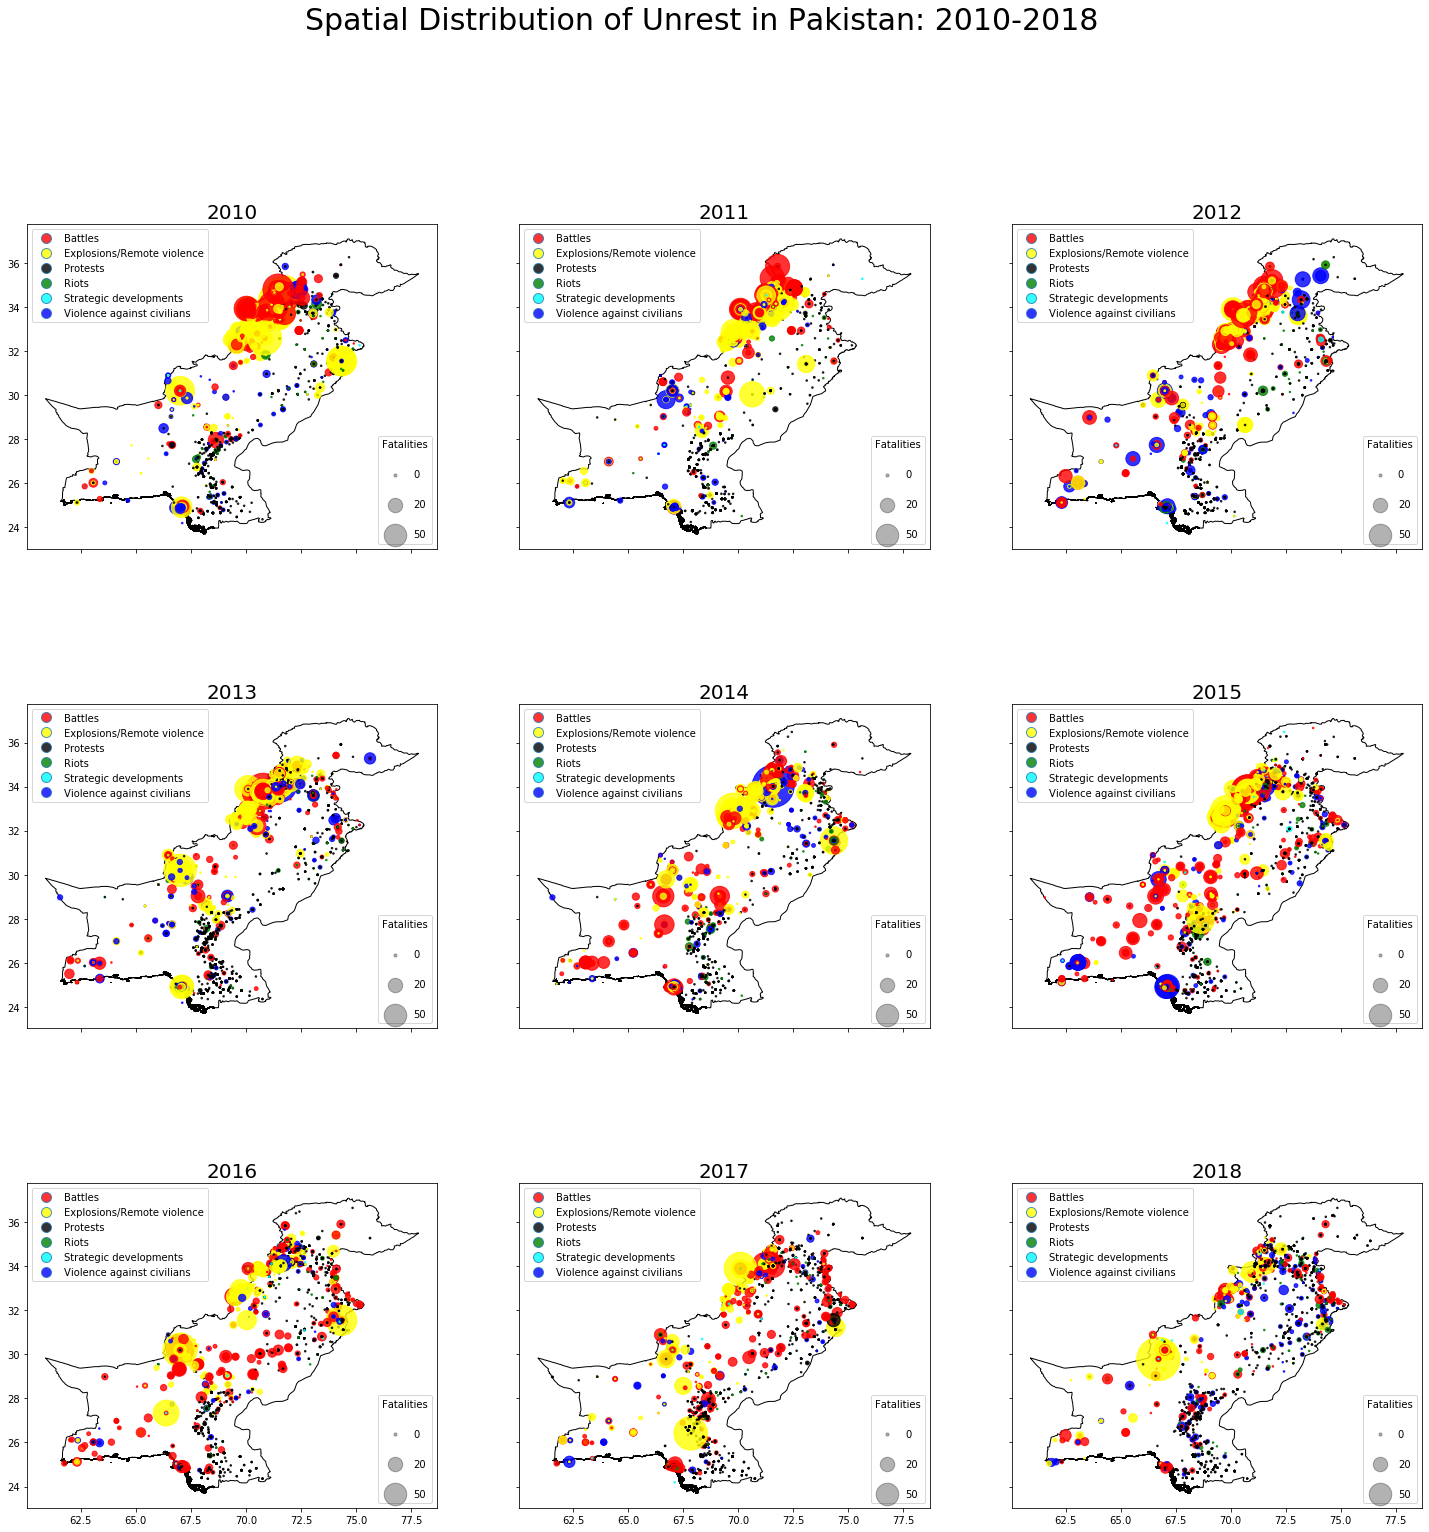

In [3]:
# Plot figure 1
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(25,25))
fig.suptitle("Spatial Distribution of Unrest in Pakistan: 2010-2018", fontsize=30)

unrest['values'] = 50*unrest['fatalities'] +  10

years = np.array([[2010, 2011, 2012],[2013, 2014, 2015],[2016, 2017, 2018]])

cmap = matplotlib.colors.ListedColormap(['red', 'yellow','black', 'green', 'cyan', 'blue'])

for i in range(0,3):
    for j in range(0,3):
        base = country0.plot(ax=ax[i][j], color='white', edgecolor='black')

        for fatal in [0, 20, 50]:
            ax[i][j].scatter([], [], c='k', alpha=0.3, s=10*fatal+10,
                        label=str(fatal))
        legend1 = ax[i][j].legend(scatterpoints=1, labelspacing=2, title='Fatalities', loc = 'lower right')

        unrest[(unrest['year'] == years[i,j])].plot(ax=base, column='event_type', categorical=True, legend=True, 
                                                    marker=".", markersize='values', cmap=cmap, alpha=0.8)

        ax[i][j].add_artist(legend1)

        ax[i][j].set_title(str(years[i,j]), fontsize=20)